# plasma with $\beta_p = 0.01, T_e/T_i = 100$

## Alfven mode decay run

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib as mpl

fs = 20
mpl.rcParams['font.size'] = fs-2
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = fs-2

### Import data

In [19]:
file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_alfven_teti_100/'
file_1 = file_dir + 'lin_upar_1' + '.heat'
file_2 = file_dir + 'lin_upar_2' + '.heat'

file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_slow_teti_100/'
file_3 = file_dir + 'lin_upar_1' + '.heat'
file_4 = file_dir + 'lin_upar_2' + '.heat'

heat_1 = np.loadtxt(file_1)
heat_2 = np.loadtxt(file_2)
heat_3 = np.loadtxt(file_3)
heat_4 = np.loadtxt(file_4)

t1, Ebperp1, Ebpar1 =heat_1[:, 0], heat_1[:, 2], heat_1[:, 3]
t2, Ebperp2, Ebpar2 =heat_2[:, 0], heat_2[:, 2], heat_2[:, 3]
t3, Ebperp3, Ebpar3 =heat_3[:, 0], heat_3[:, 2], heat_3[:, 3]
t4, Ebperp4, Ebpar4 =heat_4[:, 0], heat_4[:, 2], heat_4[:, 3]

### Plot $E_{B}$ vs $t$

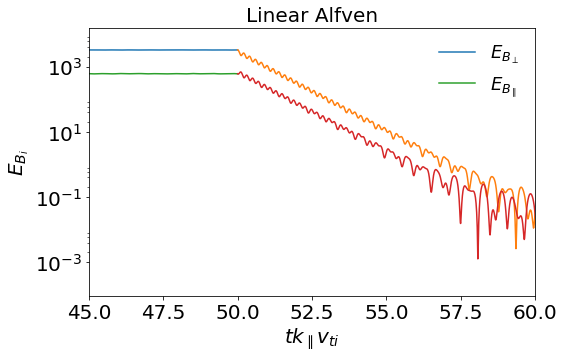

In [46]:
fig_ebpar, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1, Ebperp1, label = '$E_{B_\perp}$')
ax.plot(t2, Ebperp2)
ax.plot(t1, Ebpar1,  label = '$E_{B_\parallel}$')
ax.plot(t2, Ebpar2)
ax.set_yscale('log')
ax.set_ylabel('$E_{B_i}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim([45, 60])
ax.legend(loc = 'best', frameon = False)
ax.set_title("Linear Alfven")

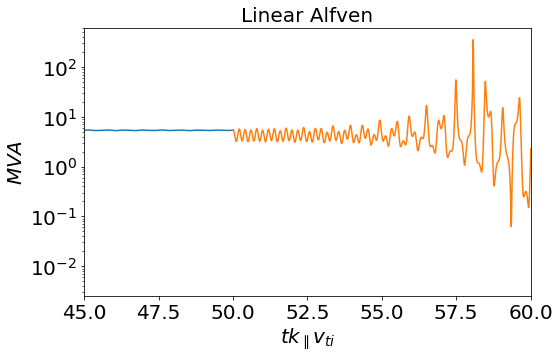

In [60]:
fig_ebpar, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1[1:], Ebperp1[1:]/Ebpar1[1:])
ax.plot(t2[1:], Ebperp2[1:]/Ebpar2[1:])

ax.set_yscale('log')
ax.set_ylabel('$MVA$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim([45, 60])
ax.set_title("Linear Alfven")

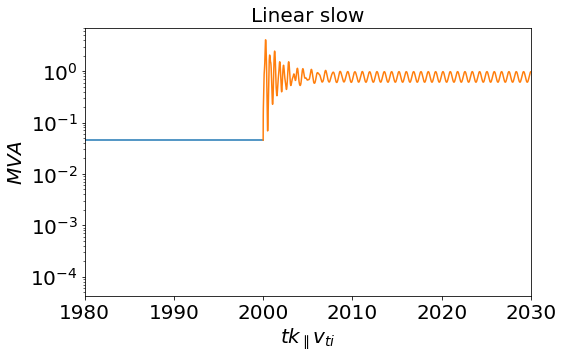

In [66]:
fig_ebpar, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t3[1:], Ebperp3[1:]/Ebpar3[1:])
ax.plot(t4, Ebperp4/Ebpar4)

ax.set_yscale('log')
ax.set_ylabel('$MVA$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim([1980, 2030])
ax.set_title("Linear slow")

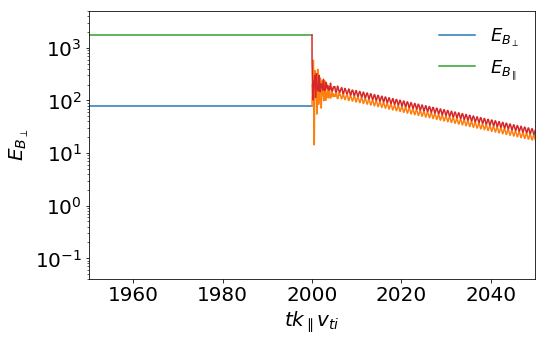

In [44]:
fig_ebpar, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t3, Ebperp3, label = '$E_{B_\perp}$')
ax.plot(t4, Ebperp4)
ax.plot(t3, Ebpar3, label = '$E_{B_\parallel}$')
ax.plot(t4, Ebpar4)
ax.set_yscale('log')
ax.set_ylabel('$E_{B_\perp}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim([1950, 2050])
ax.legend(loc = 'best', frameon = False)

### Fitting the linear runs

#### Fit Alfven wave

In [36]:
bi = 0.01
kperp = 0.2
# exponential decay model
def fit_func(t_decay, wi, wr, a, off, phi):
    tbar = t_decay/np.sqrt(bi)
    return np.exp(2*wi*tbar) * (off + a * np.cos(wr*tbar+phi)**2)

# shift time series 
xdata = t2 - t2[0]
ydata = Ebperp2
mask = xdata < 5
xdata = xdata[mask]
ydata = ydata[mask]

# initial values for fitting
wr, wi = 1.6, -0.06
a, off, phi = 1, 1000, 0

init_val = [wi, wr, a, off, phi]
# nonlinear fit
popt, pcov = curve_fit(fit_func, xdata, ydata, p0=init_val, method='lm')
# fitted parameters
wi_fit, wr_fit = popt[0], popt[1]
# fitted curve
Ebperp_fit = fit_func(xdata, *popt)

fit_label = r'Fitted $\overline{\omega}_r=$' + '{0:.3f}, '.format(wr_fit) \
            + '$\overline{\omega}_i=$' + '{0:.2g}'.format(wi_fit)

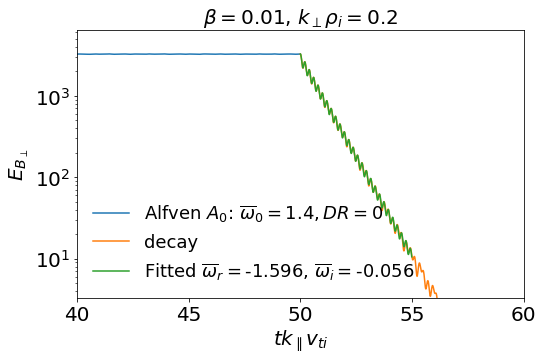

In [37]:
labels = {1:'Alfven $A_0$: {}'.format(r'$\overline{\omega}_0=1.4, DR=0$'), 2: 'decay'}
title = r'$\beta=${0:.1g}, $k_\perp\rho_i=${1:.1g}'.format(bi, kperp)

fig_Ebperp, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1, Ebperp1, label = labels[1])
ax.plot(t2, Ebperp2, label = labels[2])


ax.plot(xdata + t2[0],  Ebperp_fit, label=fit_label)
ax.set_xlim(t2[0]-10, t2[0]+10) 
ax.set_ylim(Ebperp2[0] * 1e-3, Ebperp2[0] * 2)
ax.set_yscale('log')
ax.legend(loc='best', frameon=False)
ax.set_ylabel('$E_{B_\perp}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_title(title)
# fig_Ebperp.savefig('lin_bi_1_Alfven_5.png', dpi=200)
plt.show()

#### Fit slow wave

In [38]:
bi = 0.01
kperp = 0.2
# exponential decay model
def fit_func(t_decay, wi, wr, a, off, phi):
    tbar = t_decay/np.sqrt(bi)
    return np.exp(2*wi*tbar) * (off + a * np.cos(wr*tbar+phi)**2)

# shift time series 
xdata = t4[1000:] - t4[1000]
ydata = Ebperp4[1000:]
mask = xdata < 20
xdata = xdata[mask]
ydata = ydata[mask]

# initial values for fitting
wr, wi = 0.38, -0.002
a, off, phi = 1, 100, 0

init_val = [wi, wr, a, off, phi]
# nonlinear fit
popt, pcov = curve_fit(fit_func, xdata, ydata, p0=init_val, method='lm')
# fitted parameters
wi_fit, wr_fit = popt[0], popt[1]
# fitted curve
Ebperp_fit = fit_func(xdata, *popt)

fit_label = r'Fitted $\overline{\omega}_r=$' + '{0:.3f}, '.format(wr_fit) \
            + '$\overline{\omega}_i=$' + '{0:.2g}'.format(wi_fit)

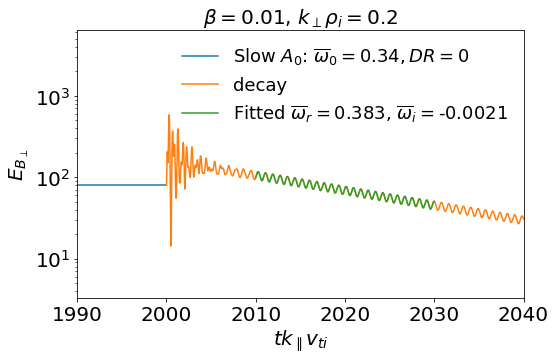

In [39]:
labels = {1:'Slow $A_0$: {}'.format(r'$\overline{\omega}_0=0.34, DR=0$'), 2: 'decay'}
title = r'$\beta=${0:.1g}, $k_\perp\rho_i=${1:.1g}'.format(bi, kperp)

fig_Ebperp, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t3, Ebperp3, label = labels[1])
ax.plot(t4, Ebperp4, label = labels[2])


ax.plot(xdata + t4[1000],  Ebperp_fit, label=fit_label)
ax.set_xlim(t4[0]-10, t4[0]+40) 
ax.set_ylim(Ebperp2[0] * 1e-3, Ebperp2[0] * 2)
ax.set_yscale('log')
ax.legend(loc='best', frameon=False)
ax.set_ylabel('$E_{B_\perp}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_title(title)
# fig_Ebperp.savefig('lin_bi_1_Alfven_5.png', dpi=200)
plt.show()

## Energy diagnostics

In [67]:
Ebperp2[0] + Ebpar2[0]

3866.7200000000003

In [68]:
Ebperp4[0] + Ebpar4[0]

1831.4010000000001

# Looks like Alfven mode energy will be ~ 2 times slow mode energy when the driving amplitudes are the same